# Homework 2
## OPER 679 - Empirical Modeling
###  MAJ Matthew Ferguson
This document produced using a jupyter notebook.
The version of the notebook server is 4.1.0-354a863 and is running on:

Python 2.7.11 |Anaconda 2.4.1 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

Current Kernel Information:

R version 3.2.2 (2015-08-14)using an R kernel, R version 3.2.2 (2015-08-14).


#### Textbook Problem 4.1
Consider the simple regression model fit to the National Football League team performance data in Problem 2.1

In [2]:
A <- read.csv("HW-2Sp-16.csv", strip.white = TRUE, header=TRUE, sep = ",")
head(A)


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
1,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
2,11,2003,2855,38.8,61.3,3,615,55,2096,1575
3,11,2957,1737,40.1,60,14,914,65.6,1847,2175
4,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
5,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866
6,11,2309,2927,39.7,74.1,8,786,61,1848,2339


a) Construct a normal probability plot of the residuals.  Does there seem to be any problem with the normality assumption?

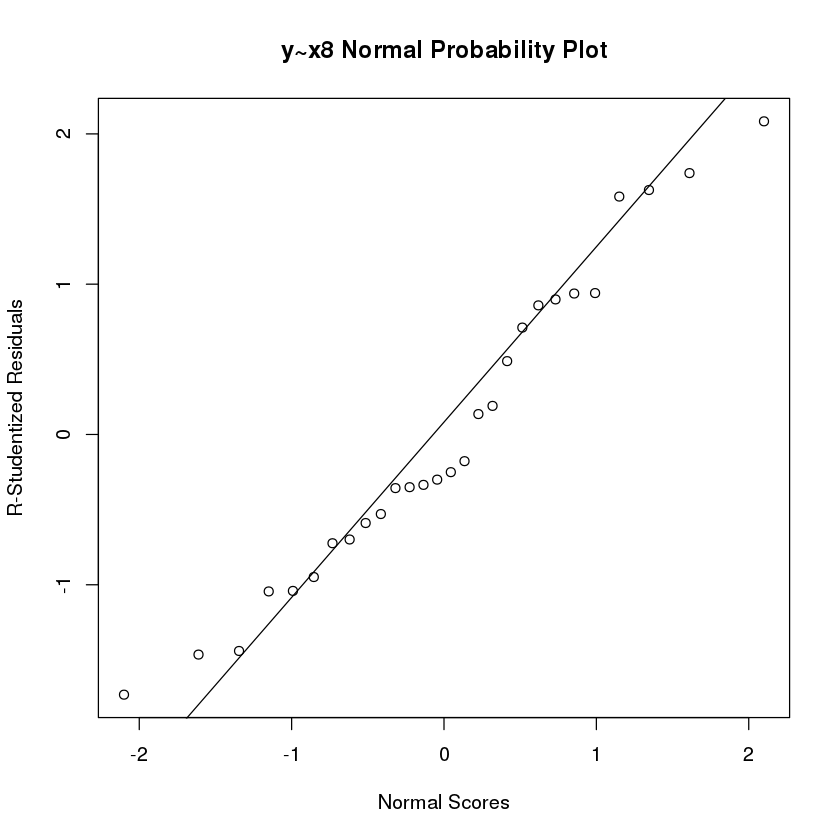

In [3]:
library(MASS)
model <- lm(y ~ x8, data=A)
residuals <- studres(model)
qqnorm(residuals, ylab="R-Studentized Residuals", xlab="Normal Scores", main="y~x8 Normal Probability Plot") 
qqline(residuals) 

By the "fat pencil" test, there do not appear to be significant deviations from normality.  There is some indication of being "light-tailed" if you use a particularly thin pencil, but the rule of thumb is a "fat pencil".

b)  Construct and interpret a plot of the residuals versus the predicted response.


[1] "Correlation of fitted values to the residuals: -0.00822232826654008"

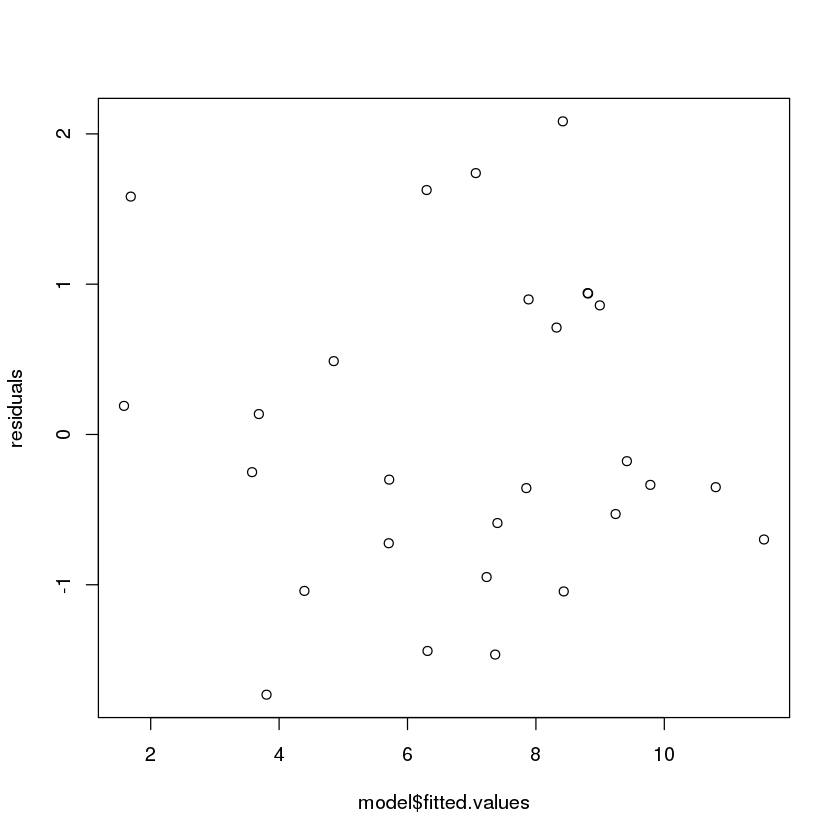

In [4]:
plot(residuals~model$fitted.values)
paste("Correlation of fitted values to the residuals:", toString(cor(residuals,model$fitted.values)))

There appears to be no correlation between the fitted values and the residuals.  If a stronger correlation were present, that would imply that there is additional variability in the model that could be explained by the regressor.  We could then proceed to evaluate some non-linear term of the regressor or an interaction term in an attempt to explain this additional variability.

c)  Plot the residuals versus the team passing yardage, x<sub>2</sub>.   Does this plot indicate that the model will be improved by adding x<sub>2</sub> to the model?

Repeat for x<sub>7</sub>.

[1] "Correlation of x2 and the residuals: 0.664607506893894"

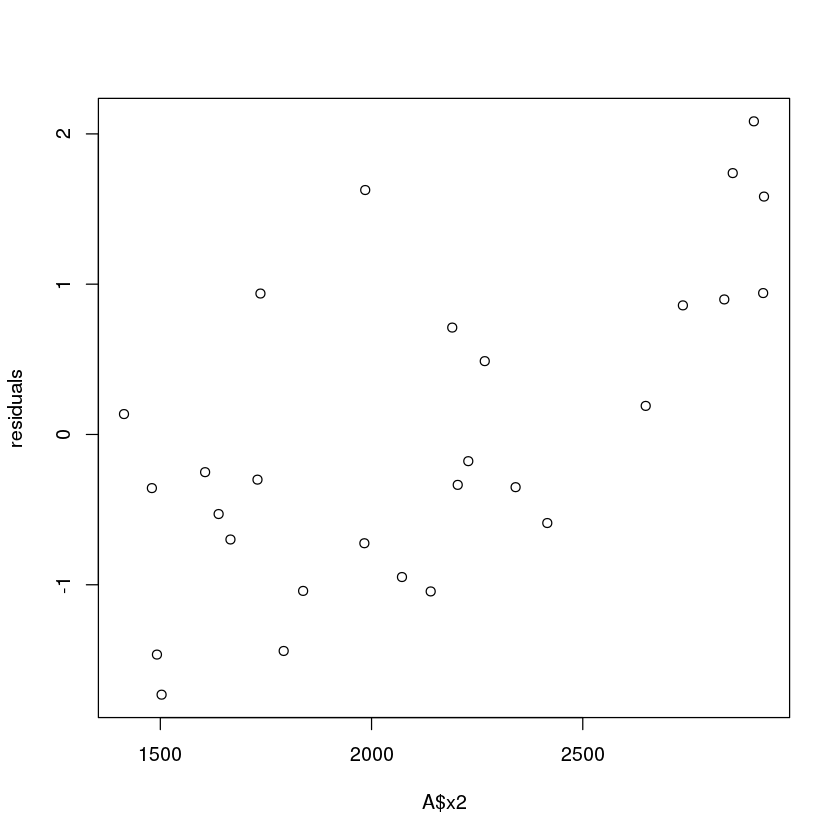

[1] "Correlation of x7 and the residuals: 0.0536055882481425"

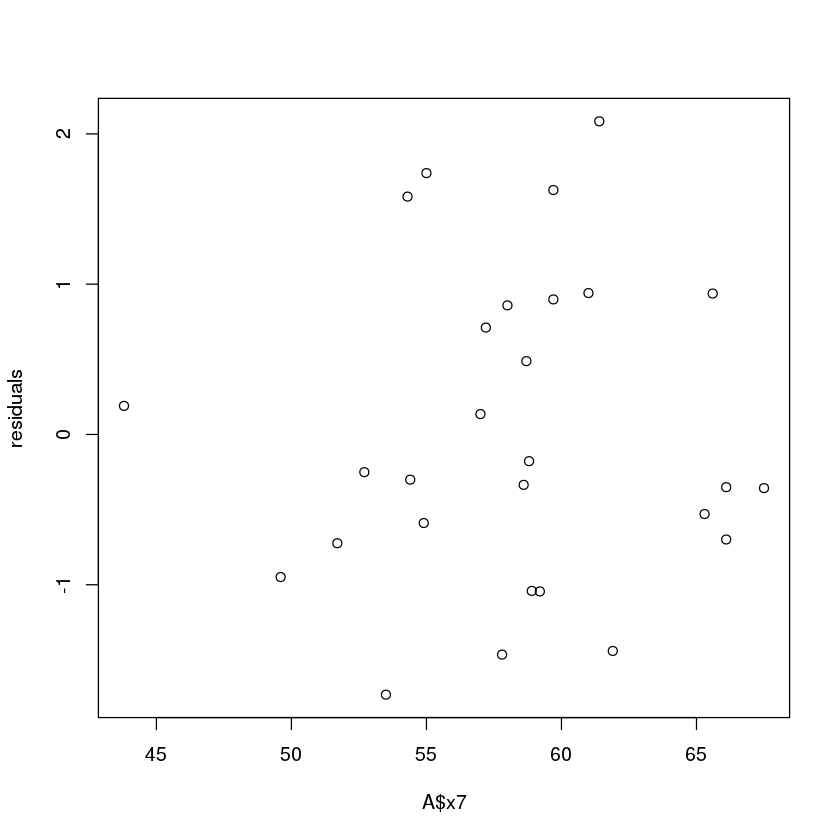

In [5]:
plot(residuals~A$x2)
paste("Correlation of x2 and the residuals:", toString(cor(residuals,A$x2)))

plot(residuals~A$x7)
paste("Correlation of x7 and the residuals:", toString(cor(residuals,A$x7)))


Since x<sub>2</sub> appears to have a correlation with the model residuals, there is additional variability in the model that can be explained by adding x<sub>2</sub> as a regressor. 

x<sub>7</sub> has a slight correlation, but is practically zero.  In this case, the addition of x<sub>7</sub> would likely not contribute much towards explaining the variance in our model.  I would prefer to add x<sub>2</sub> before adding x<sub>7</sub> since x<sub>2</sub> has a greater correlation.  The addition of x<sub>2</sub>  to the model would also be predicated on the juxtaposition of the parsimony of the expanded model to its marginal ability to explain variance.  This juxtaposition can be evaluated by contrasting the adjusted R<sup>2</sup>  of the expanded model and the adjusted R<sup>2</sup> of the current model.  I would then see if there was a significant enough change to subsequently add x<sub>2</sub>.  

#### Textbook problem 4.2
Consider the multiple regression model fit to the National Football League team performance data in Problem 3.1. 

a) Construct a normal probabilty plot of the residuals.

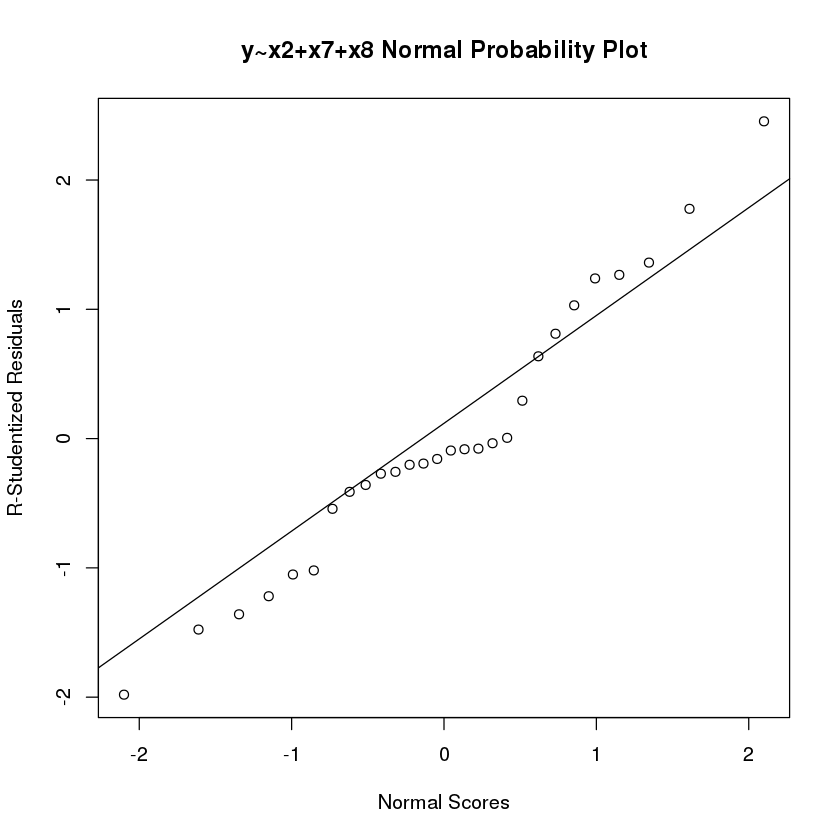

In [6]:
model <- lm(y~x2+x7+x8, data = A)
residuals <- studres(model)
qqnorm(residuals, ylab="R-Studentized Residuals", xlab="Normal Scores", main="y~x2+x7+x8 Normal Probability Plot") 
qqline(residuals) 

There does not appear to be any problem with the normality assumption. While there is some minor deviation from the line, the plot passes the "fat pencil" heuristic.

b) Construct and interpret a plot of the residuals versus the predicted response.

First, I will copy and paste the code from question 4.1 b).


[1] "Correlation of fitted values to the residuals: 0.00233994212215379"

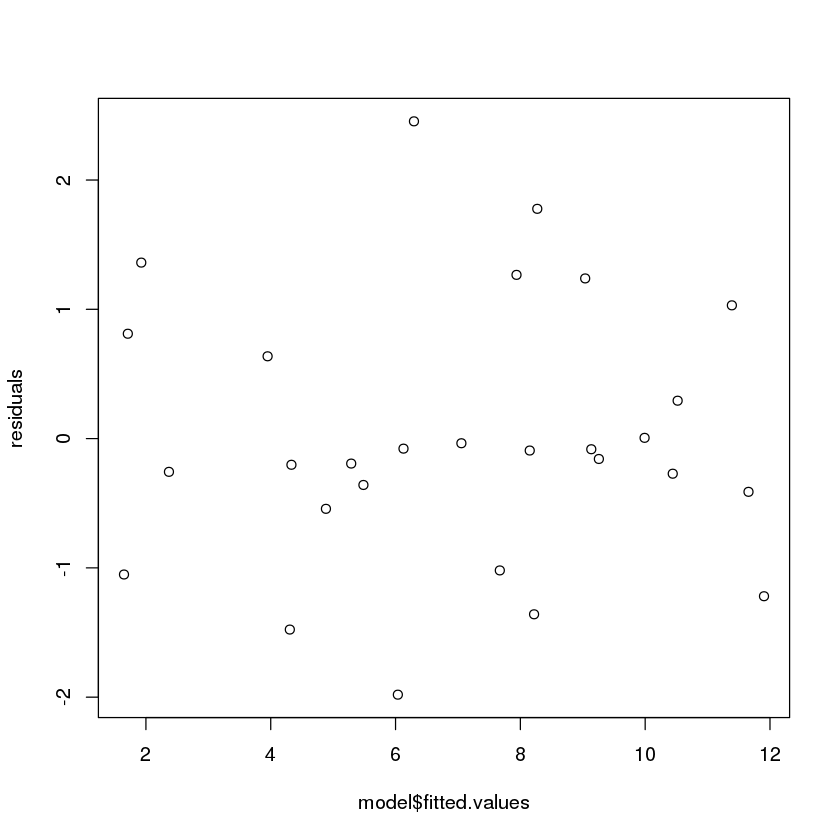

In [7]:
plot(residuals~model$fitted.values)
paste("Correlation of fitted values to the residuals:", toString(cor(residuals,model$fitted.values)))

It is as expected, since there is no correlation or pattern between the fitted model values and the residuals.

c) Construct plots of the residuals versus each of the regressor variables. Do these plots imply that the regressor is correctly specified?

We can examine these plots as the first row of a scatterplot matrix.

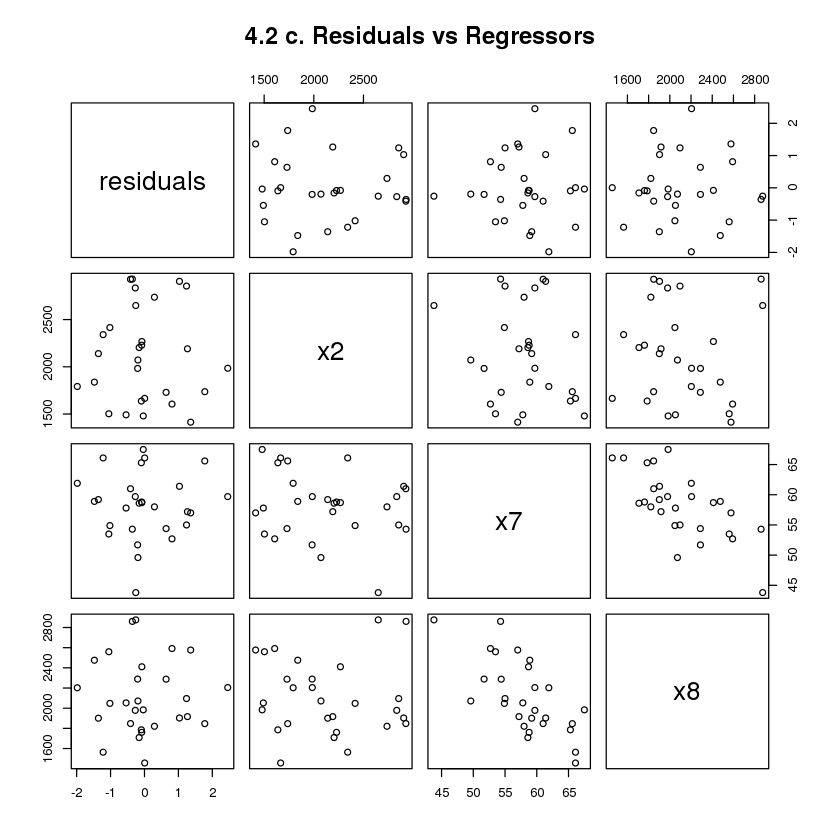

In [8]:
pairs(~residuals+x2+x7+x8, data=A, main="4.2 c. Residuals vs Regressors")


From here, our only possible concern might be possible heteroscedacity in the second and third (residual ~ x<sub>7</sub> and residual~x<sub>8</sub> ) plots.  In each case, we may wish to perform a transformation on the response variable to ensure better fit.  Or we can throw up our hands, say "close enough for government work" and grab a beer.  It's Friday night, after all.

d) Do partial regression/avp plots. (below).
The only one that has something funky (a technical term, of course) going on is x<sub>7</sub>.  There is alot of deviation, but then again some winning teams run the ball alot.  Some losing teams also run ball alot. Perhaps there's an interaction that cannot be determined by this plot between regressors.  Likely there is an underlying relationship between the percentage of running plays and the total running yards achieved.  Further analysis will likely be required to ensure that we are ignoring some interaction between running play percentage and rushing yardage.

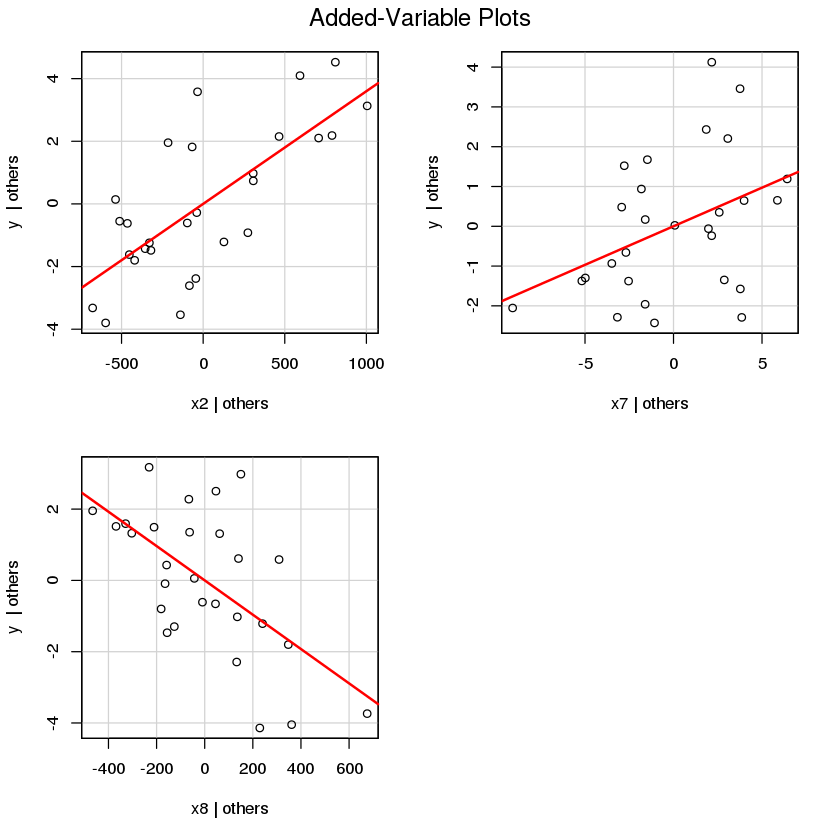

In [9]:
library(car)
avPlots(model, ~x2+x7+x8)

e) Compute the studentized and the R-studentized residuals for this model.  What information is conveyed by these scaled residuals?

This answer is almost trivial, but the values in <i> residuals </i> are the R-studentized residuals.  A simple function call to rstandard yields the Studentized residuals.  These are plotted below against thier index/observation order.  These scaled residuals account (or attempt to account) for the non-constant variance of uncorrected residuals.


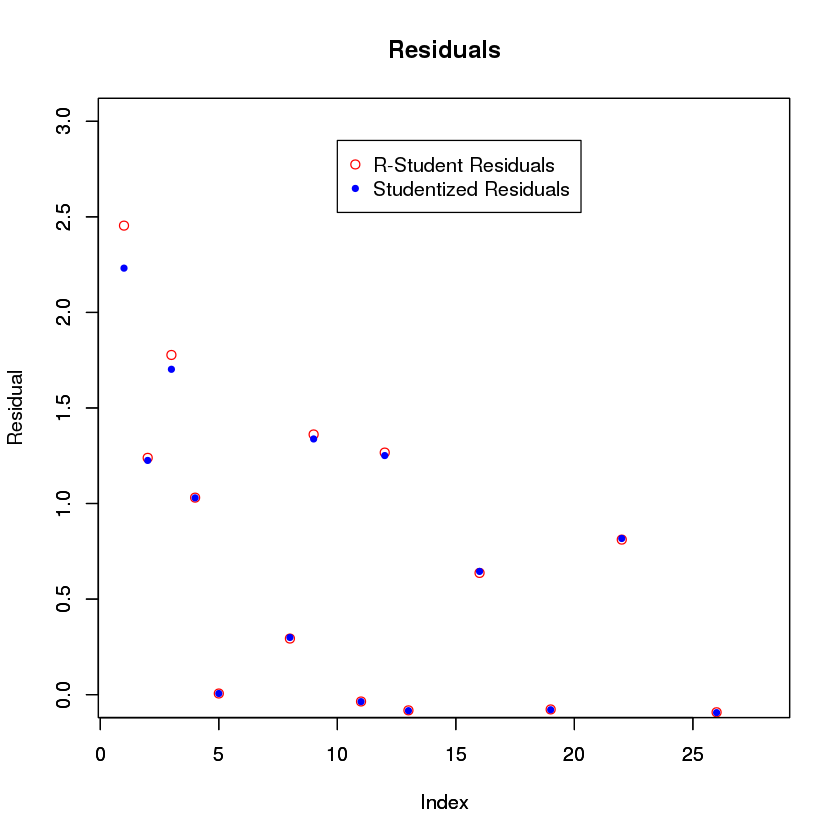

In [10]:
plot(residuals, main="Residuals", col="red", ylim=c(0,3), ylab="Residual")
par(new=TRUE, pch=20)
plot(rstandard(model), main="", col="blue", ylim=c(0,3), ylab="")
legend(10,2.9,c("R-Student Residuals","Studentized Residuals"), col=c("red", "blue"), pch=c(1, 20))

,Sum Sq,Df,F value,Pr(>F)
(Intercept),0.1525129,1,0.05238741,0.820899
x2,78.02809,1,26.80226,2.655723e-05
x7,14.06819,1,4.832354,0.03781516
x8,41.40006,1,14.22072,0.0009377699
Residuals,69.87,24,NA,NA


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
y,1.00000000,0.59323604,0.48273470,-0.08081247,0.25847477,0.51320624,0.22403447,0.54534104,-0.73802730,-0.30374811
x1,0.59323604,1.00000000,-0.03674736,0.21247123,0.07029904,0.59998017,0.25297272,0.83728269,-0.65854627,-0.11055739
x2,0.48273470,-0.03674736,1.00000000,-0.06881516,0.30151583,0.13499515,-0.19283713,-0.19691540,-0.05104783,0.14598149
x3,-0.080812472,0.212471227,-0.068815157,1.000000000,-0.413095614,0.115098074,-0.003115748,0.162511469,0.290438108,0.088195595
x4,0.25847477,0.07029904,0.30151583,-0.41309561,1.00000000,0.14902865,-0.12818435,-0.10100316,-0.16402353,0.05913611
x5,0.51320624,0.59998017,0.13499515,0.11509807,0.14902865,1.00000000,0.25891534,0.60956318,-0.47004608,-0.09028906
x6,0.224034472,0.252972716,-0.192837129,-0.003115748,-0.128184348,0.258915336,1.000000000,0.367077900,-0.352493271,-0.172756078
x7,0.5453410,0.8372827,-0.1969154,0.1625115,-0.1010032,0.6095632,0.3670779,1.0000000,-0.6850457,-0.2033178
x8,-0.73802730,-0.65854627,-0.05104783,0.29043811,-0.16402353,-0.47004608,-0.35249327,-0.68504573,1.00000000,0.41746519
x9,-0.30374811,-0.11055739,0.14598149,0.08819559,0.05913611,-0.09028906,-0.17275608,-0.20331784,0.41746519,1.00000000


ERROR: Error in eval(expr, envir, enclos): could not find function "pca"


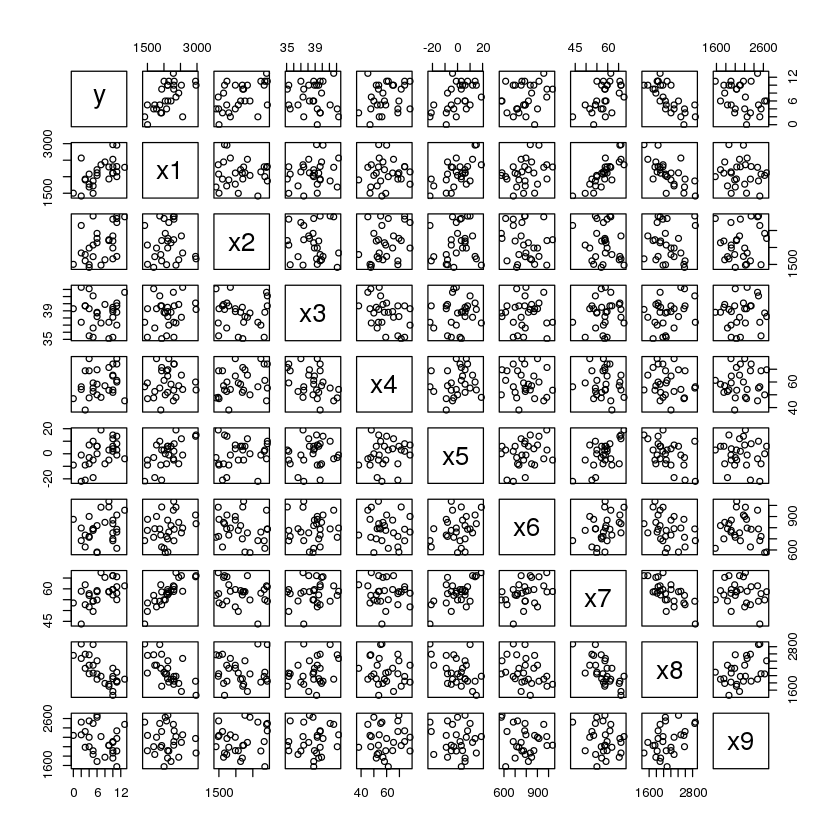

In [64]:
library(car)
model2 <- lm(y ~  x2+x7+x8, contrasts = c("contr.sum", "contr.poly"), 
    data = A)
Anova(model2, type = 3)
pairs(A)

In [86]:
model3 <- lm(y ~  0+x2+x7+x8, data = A) #repeatedly changed to examine poly(xn,2) and full model on down...
summary(model3)
r3 <- studres(model3)



Call:
lm(formula = y ~ 0 + x2 + x7 + x8, data = A)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9707 -0.6953 -0.2601  1.0570  3.7442 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
x2  0.0035213  0.0005969   5.899 3.73e-06 ***
x7  0.1747501  0.0266986   6.545 7.41e-07 ***
x8 -0.0050642  0.0006581  -7.695 4.74e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.674 on 25 degrees of freedom
Multiple R-squared:  0.9584,	Adjusted R-squared:  0.9535 
F-statistic: 192.2 on 3 and 25 DF,  p-value: < 2.2e-16


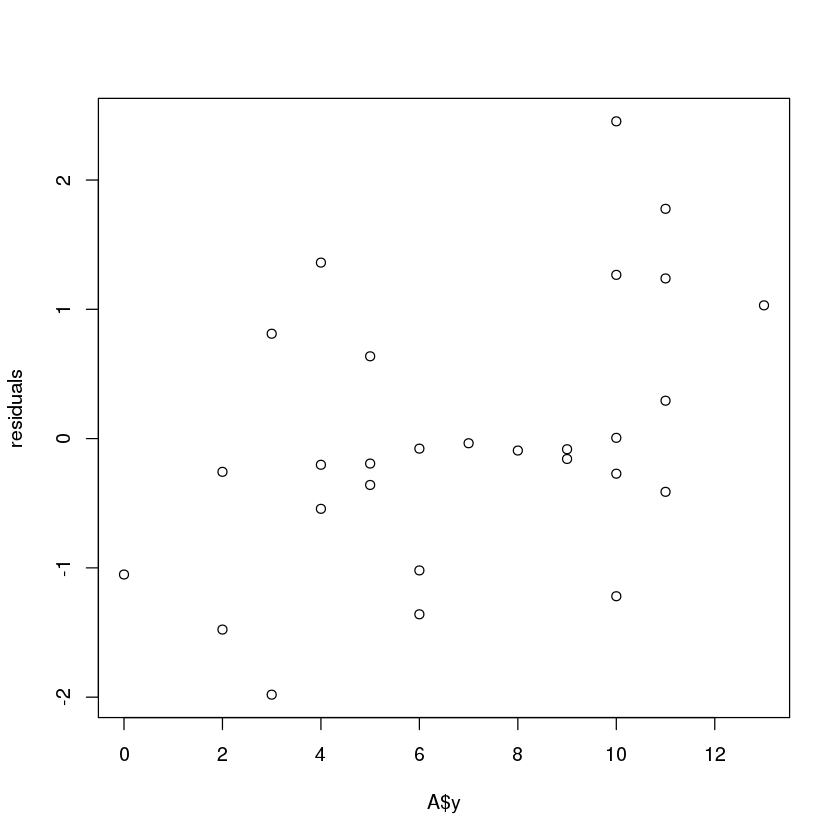

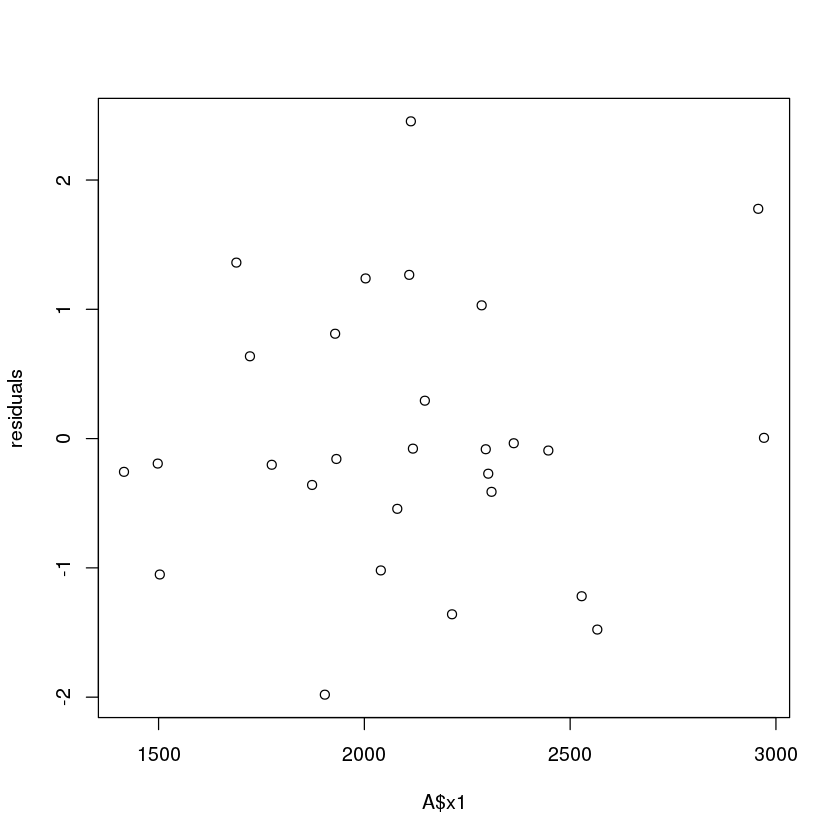

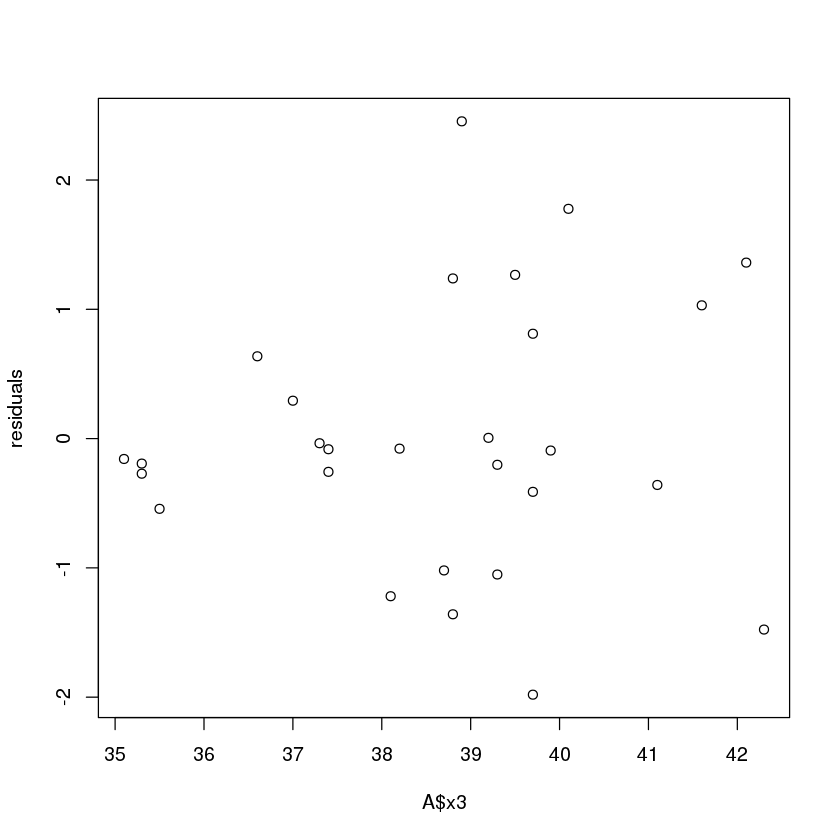

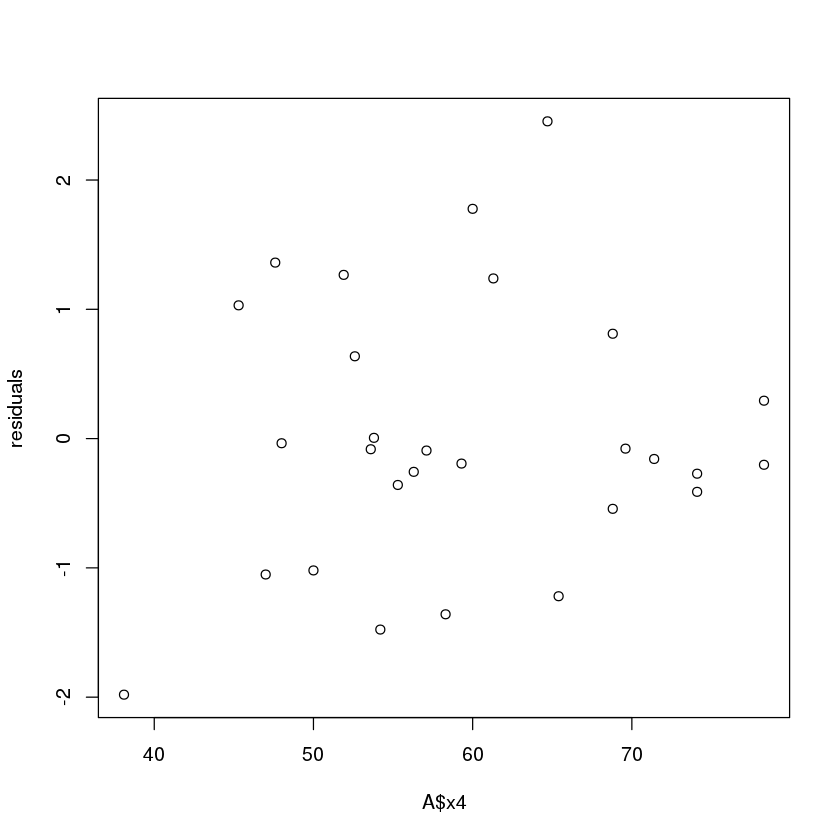

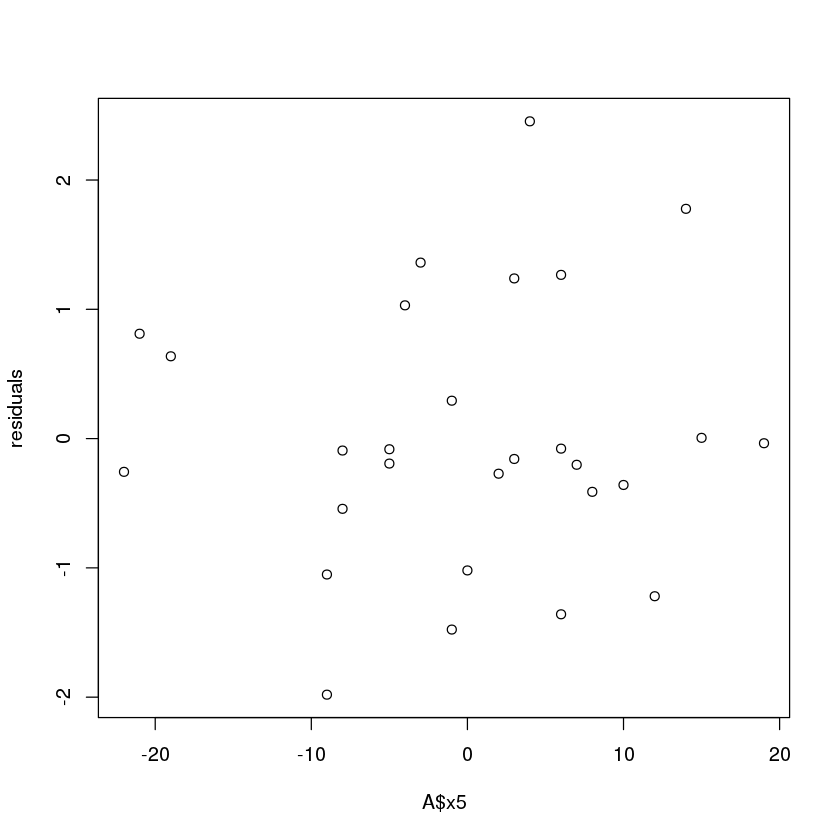

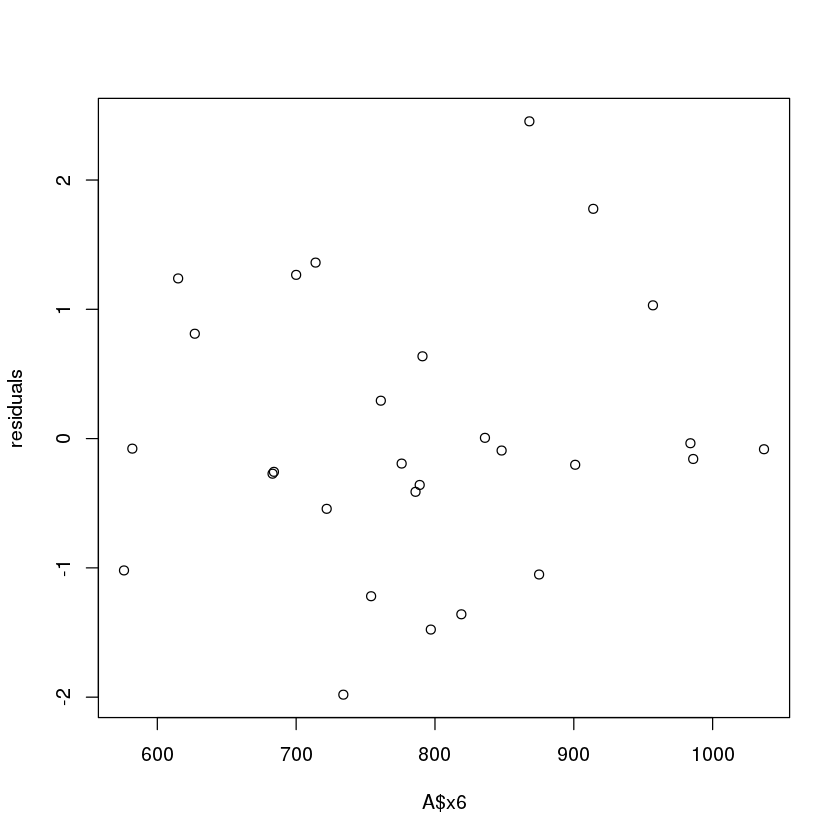

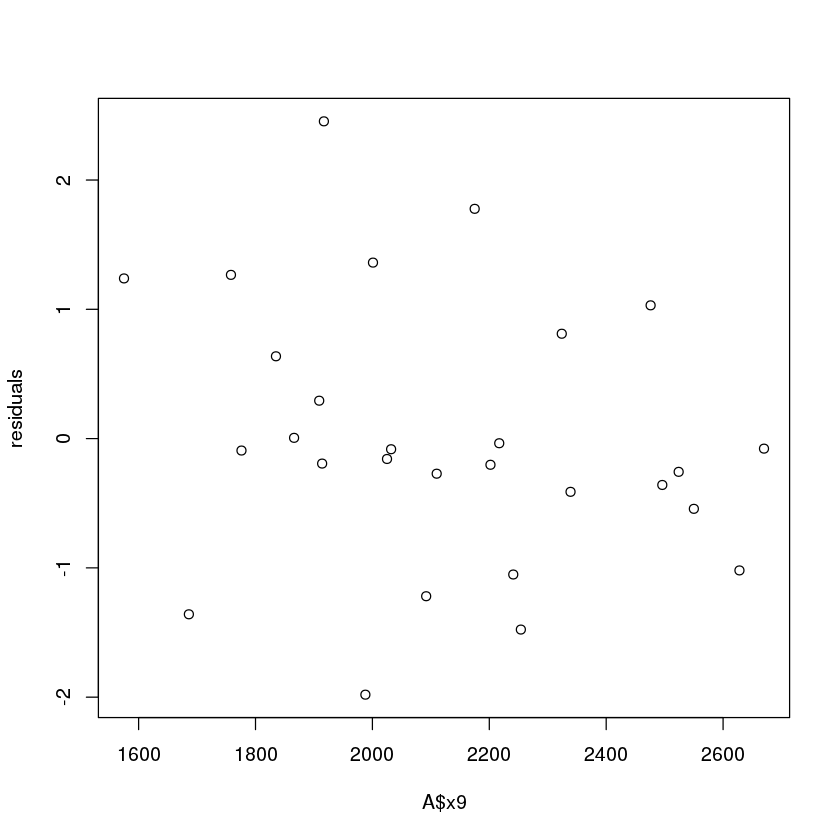

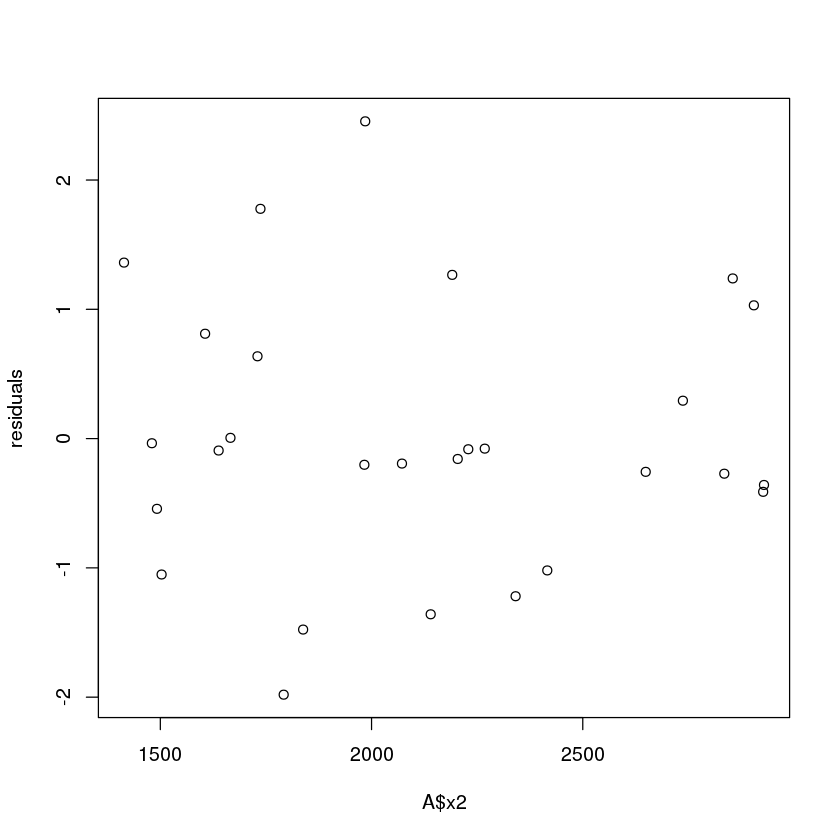

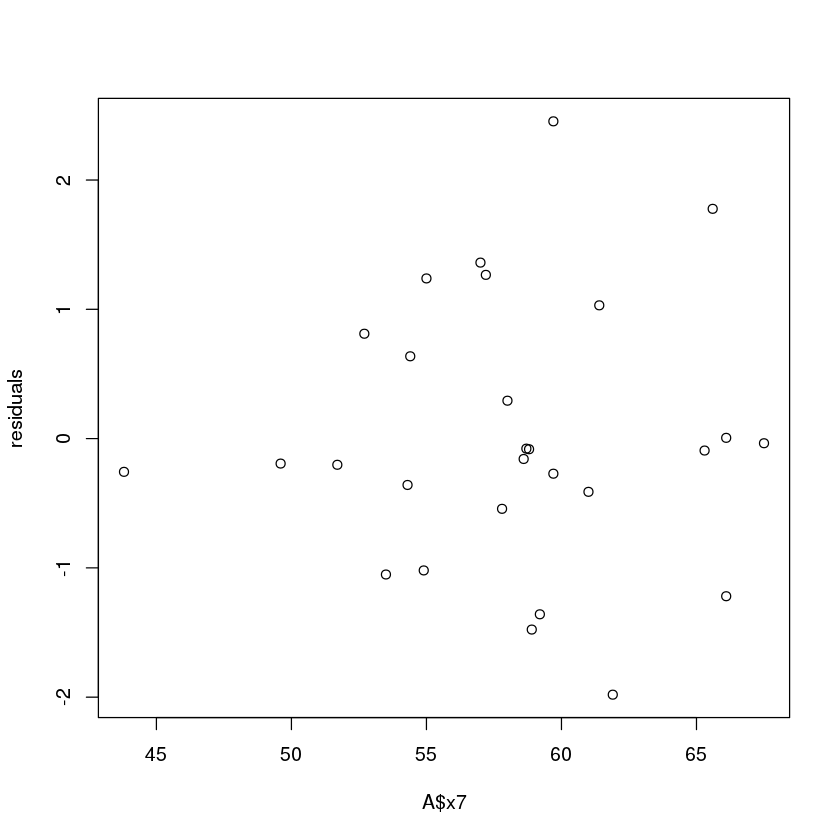

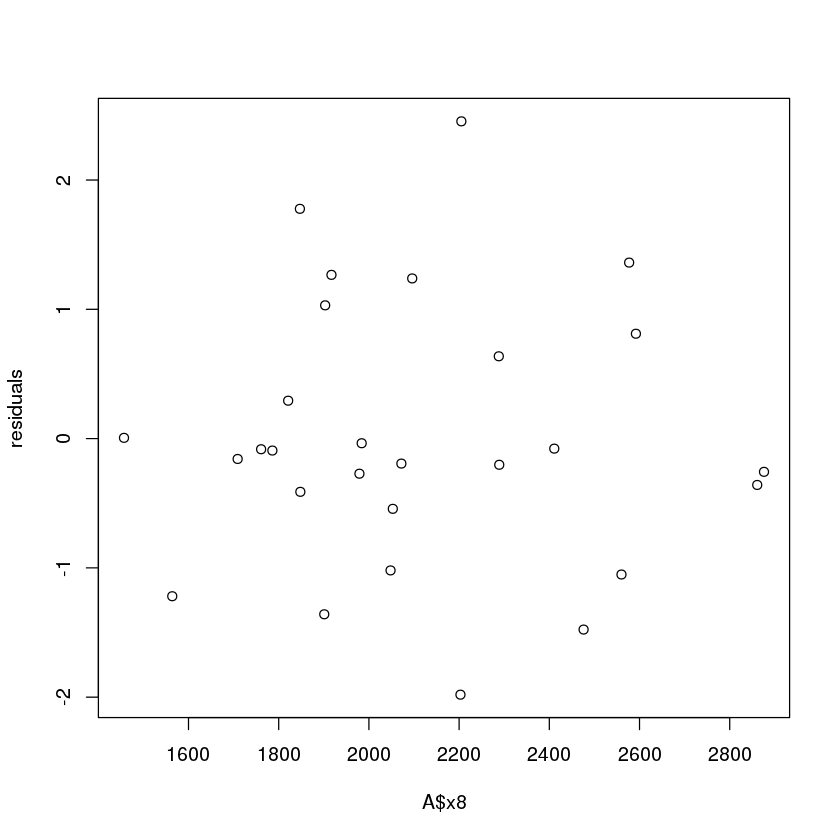

In [57]:
##### par(mfrow=c(1,1))
plot(residuals~A$y)

#Possible additional regressors for the dataset
plot(residuals~A$x1)
plot(residuals~A$x3)
plot(residuals~A$x4)
plot(residuals~A$x5)
plot(residuals~A$x6)
plot(residuals~A$x9)

#Possible additional regressors for a polynomial fit
plot(residuals~A$x2)
plot(residuals~A$x7)
plot(residuals~A$x8)


After examination of each of the residuals, there do not appear to be any other significant factors that we would wish to add as regressors.  Just for curiosity, I did explore some possible polynomial regressors (mostly to explore how they are accomplished in R using the poly() function) but none of these regressors were significant.  There is some mild heteroscedasticity observed in the residuals with respect to some of the remaining data, identified as a mild "vee" shape from changes in variance over changes in the possible additional regressor ("x").  However, no linear or polynomial relationship expressed.  The observed heteroscedasticity might be due to an unobserved factor that has a contributing relationship with these variables.  Just to confirm the linear model was well constructed, I lastly constructed a full regression model with all nine variables and singly removed the regressors with the highest t-statistic.  This process resulted in the same three-regressor model with x<sub>2</sub>, x<sub>7</sub> and x<sub>8</sub>.